In [1]:
# Generate NCI reports for given projects
import os
import sys

user_id = os.environ['USER']

# Insert your local paths here
sys.path.append(f'/home/548/{user_id}/code/nci_resource_tools')
sys.path.append(f'/home/548/{user_id}/code/nci-tools/src/ncitools')


In [2]:
import pandas as pd
import subprocess 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from nci_account import nci_account
from nci_resource_tools.read_project import retrieve_project_data, create_storage_df
from config import *

In [3]:
COE_PROJECTS

['gb02', 'fy29', 'if69', 'ng72', 'su28']

In [4]:
SU_df_dict, grant_dict, storage_dict = retrieve_project_data()

In [5]:
# Check usage against reservations
for project in grant_dict.keys():
    SUs_df = SU_df_dict[project]

    # Filter by reserves being allocated
    reserved = SUs_df['total_reserved'] > 0
    
    for row in SUs_df[reserved].itertuples():
        if row.usage > row.total_reserved:
            print(f"WARNING : For {project} : user {row.Index} has used {row.usage:.2f} kSUs exceeding their {row.total_reserved:.2f} kSU allocation")
    

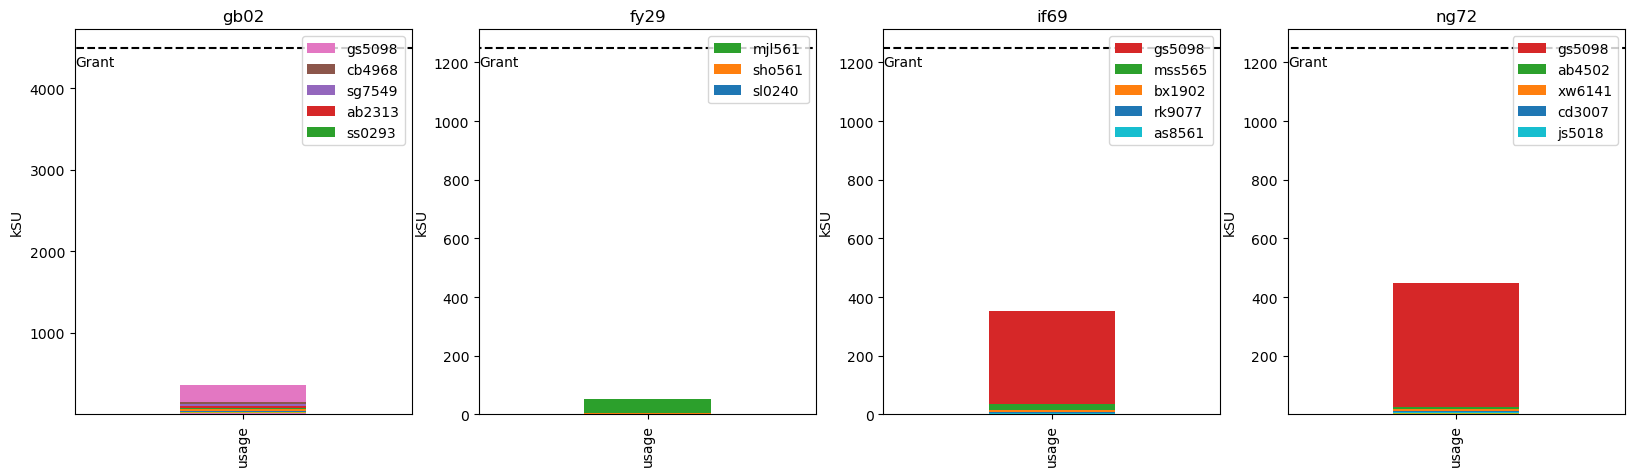

In [18]:
# Plot kSUs for every project
fig,axes = plt.subplots(1,len(grant_dict),figsize=(20,5))

USER_NAMES = 5  #Plot the top five usernames of SU usage

for i,project in enumerate(grant_dict.keys()):
    
    SU_df_dict[project]['usage'].sort_values(ascending=True).to_frame().T.plot.bar(stacked=True,ax=axes[i],width=0.3)
    patches, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(handles=patches[-USER_NAMES:][::-1],labels=labels[-USER_NAMES:][::-1])
    axes[i].hlines(grant_dict[project],-5,5,linestyles='dashed',color='black')
    axes[i].annotate('Grant',(-0.4,0.95*grant_dict[project]))
    axes[i].yaxis.set_label_text('kSU')
    axes[i].set_title(project)

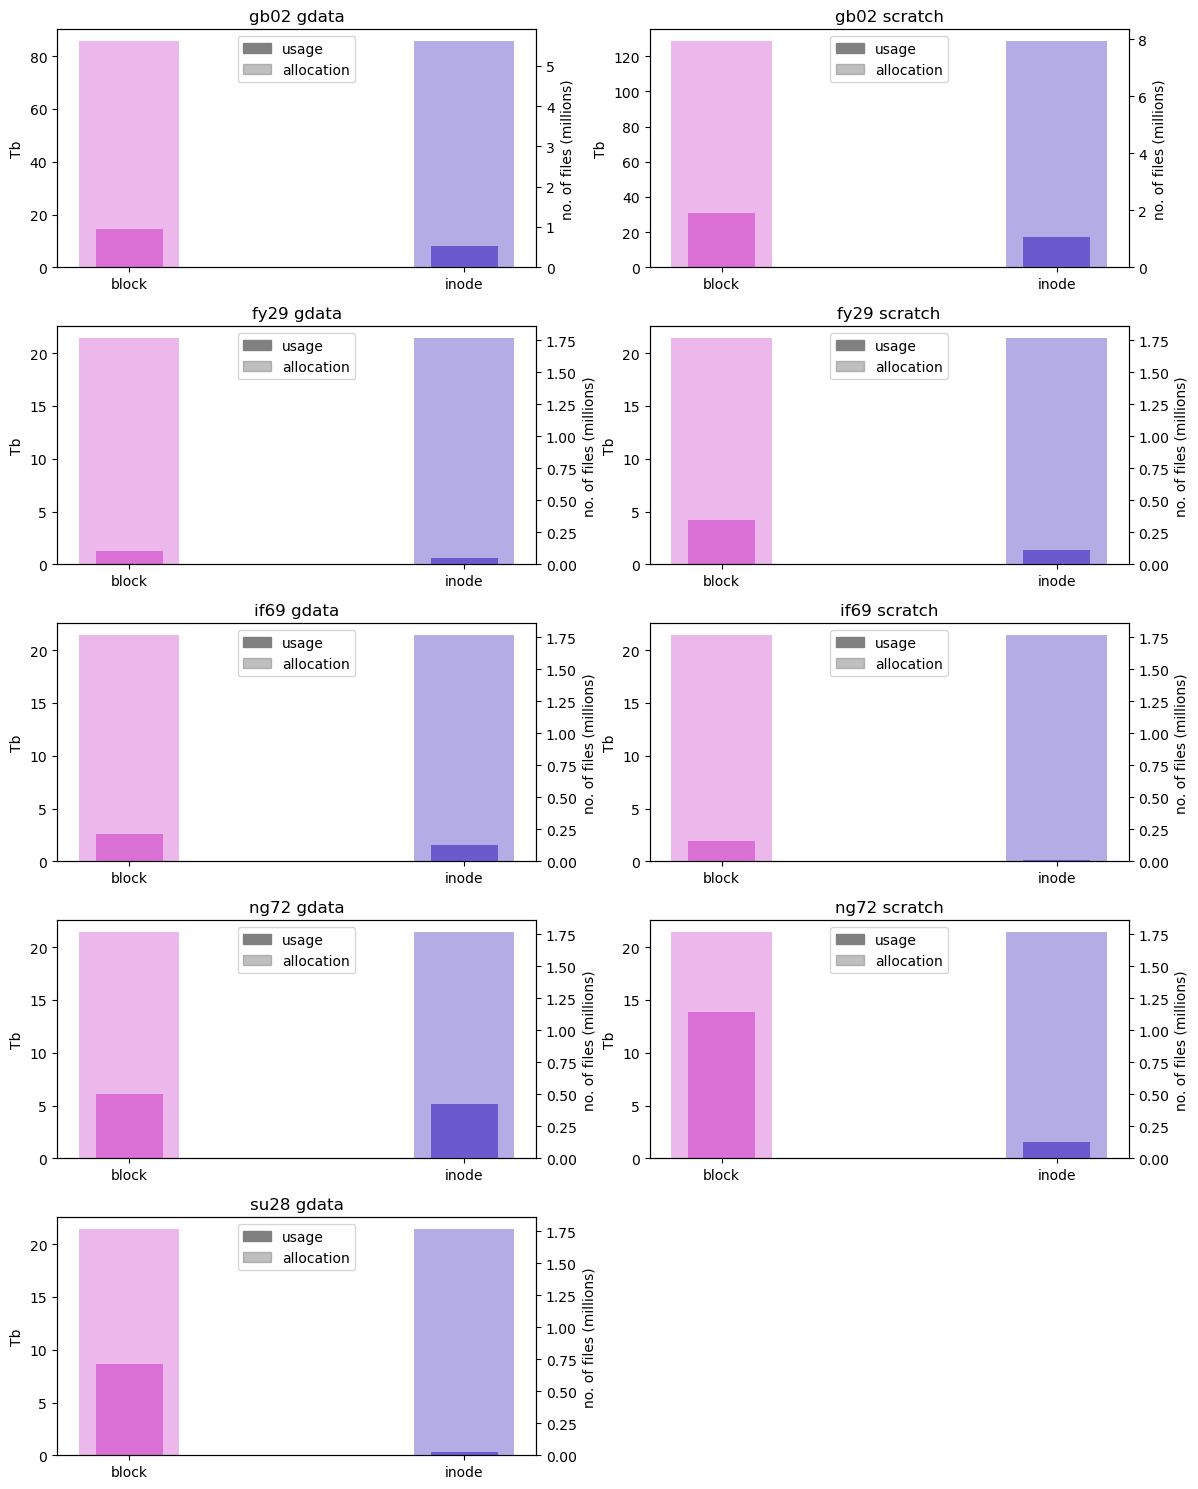

In [14]:
num_columns=2
num_rows = len(COE_PROJECTS)    
num_plots = sum(len(v) for v in storage_dict.values())
    
Position = range(1,num_plots+1)

fig_height = num_rows*3
fig_width = 12

fig = plt.figure(figsize=(fig_width,fig_height))
k = 0

for project in COE_PROJECTS:
    for disk in storage_data[project].keys():

        ax = fig.add_subplot(num_rows, num_columns, Position[k])
        ax.bar(x=['block'],height=storage_data[project][disk]['usage'].loc['block'],width=0.2,label='usage',color='orchid')
        ax.bar(x=['block'],height=storage_data[project][disk]['allocation'].loc['block'],alpha=0.5,width=0.3,label='allocation',color='orchid')
        ax2=ax.twinx()
        ax2.bar(x=['inode'],height=storage_data[project][disk]['usage'].loc['inode'],width=0.2,label='usage',color='slateblue')
        ax2.bar(x=['inode'],height=storage_data[project][disk]['allocation'].loc['inode'],alpha=0.5,width=0.3,color='slateblue',label='allocation')
        ax.yaxis.set_label_text('Tb')
        ax2.yaxis.set_label_text('no. of files (millions)')
        
        usage_patch=mpatches.Patch(color='grey',label='usage')
        alloc_patch=mpatches.Patch(color='grey',alpha=0.5,label='allocation')
        ax.legend(handles=[usage_patch,alloc_patch],loc=9)
        ax.set_title(f'{project} {disk}')

        k+= 1
        
plt.tight_layout()

In [15]:
# Find the largest individual users (this takes a while)
project='gb02'
command = f'du -hs /g/data/{project}/* | sort -h'
output = subprocess.run(command, capture_output=True, shell=True)

c=output.stdout.decode('utf-8').splitlines()

# Split the output and create a dictionary
d = {}
for x in c:
    d[x.split('/')[-1]] = x.split('\t')[0]

user_storage = pd.DataFrame.from_dict(d,orient='index')

In [19]:
user_storage[::-1]

,0
sl5165,6.6T
zz6006,3.5T
sc5932,836G
ad0576,616G
ak2642,368G
sg7549,166G
users,48G
mf9078,45G
ec0044,25G
lk5320,23G


In [287]:
# Find the largest individual users (this takes a while)
command = f'du -s /g/data/{project}/* | sort -h'
output_numeric = subprocess.run(command, capture_output=True, shell=True)

c=output_numeric.stdout.decode('utf-8').splitlines()

# Split the output and create a dictionary
d = {}
for x in c:
    d[x.split('/')[-1]] = x.split('\t')[0]

user_storage_numeric = pd.DataFrame.from_dict(d,orient='index')

In [ ]:
user_storage_numeric.rename(columns={0:'size'},inplace=True)

In [ ]:
c=output_numberic.stdout.decode('utf-8').splitlines()

# Split the output and create a dictionary
d = {}
for x in c:
    d[x.split('/')[-1]] = x.split('\t')[0]

user_storage_numeric = pd.DataFrame.from_dict(d,orient='index').astype('int')

In [ ]:
pd.set_eng_float_format(accuracy=2)
user_storage_numeric.sort_values('size',ascending=False)/1024

In [ ]:
user_storage_numeric.T.plot.bar(stacked=True)

In [12]:
storage_data=create_storage_df(storage_dict)

In [16]:
20*2/3

13.333333333333334